In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
evts_path = '/Users/carmenromoluque/nexus_petit_analysis/tof_setup/PetBox_analysis/data_charge/charge_select_area0_true_info_dists_saveqs/'

tot_charges           = []
dist_ztrue_zsens      = []
dist_true_sens_module = []
all_true_pos          = []
all_charges           = []
all_sns_positions     = []
all_sns_ids           = []
touched_sipms         = []
evt_ids               = []

for filename in os.listdir(evts_path):
    if filename.endswith('thr2pes.npz'):
        my_file   = evts_path+filename
        d = np.load(my_file, allow_pickle=True)
        tot_charges           = np.concatenate((np.array(d['tot_charges']),           tot_charges          ))
        dist_ztrue_zsens      = np.concatenate((np.array(d['dist_ztrue_zsens']),      dist_ztrue_zsens     ))
        dist_true_sens_module = np.concatenate((np.array(d['dist_true_sens_module']), dist_true_sens_module))
        all_charges           = np.concatenate((np.array(d['all_charges']),           all_charges))
        all_sns_positions     = np.concatenate((np.array(d['all_sns_positions']),     all_sns_positions))
        all_sns_ids           = np.concatenate((np.array(d['all_sns_ids']),           all_sns_ids))
        touched_sipms         = np.concatenate((np.array(d['touched_sipms']),         touched_sipms        ))
        evt_ids               = np.concatenate((np.array(d['evt_ids']),               evt_ids              ))
        for i in d['all_true_pos']:
            all_true_pos.append(i)

tot_charges           = np.array(tot_charges          )
dist_ztrue_zsens      = np.array(dist_ztrue_zsens     )
dist_true_sens_module = np.array(dist_true_sens_module)
all_true_pos          = np.array(all_true_pos)
all_charges           = np.array(all_charges)
all_sns_positions     = np.array(all_sns_positions)
all_sns_ids           = np.array(all_sns_ids)
touched_sipms         = np.array(touched_sipms        )
evt_ids               = np.array(evt_ids              )

all_var_rs  = []
all_mean_rs = []
for qs, sns_pos in zip(all_charges, all_sns_positions):
    pos_r  = np.array([np.sqrt(p[0]**2 + p[1]**2) for p in sns_pos])
    mean_r = np.average(pos_r, weights=qs)
    var_rs = np.average((pos_r - mean_r)**2, weights=qs)
    all_mean_rs.append(mean_r)
    all_var_rs .append(var_rs)

all_mean_rs = np.array(all_mean_rs)
all_var_rs  = np.array(all_var_rs)

### Distance between the true pos and the sensor with max charge (module)

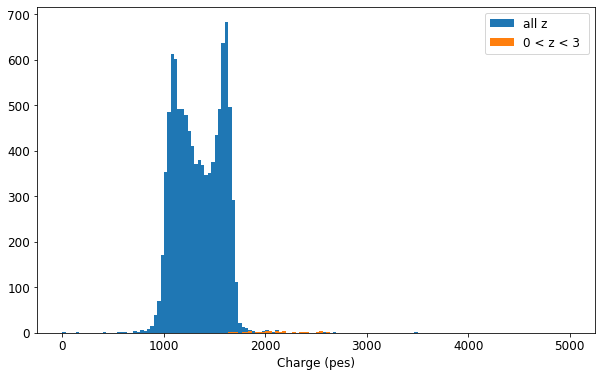

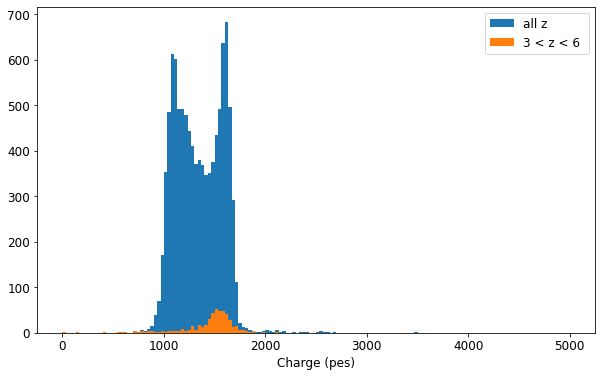

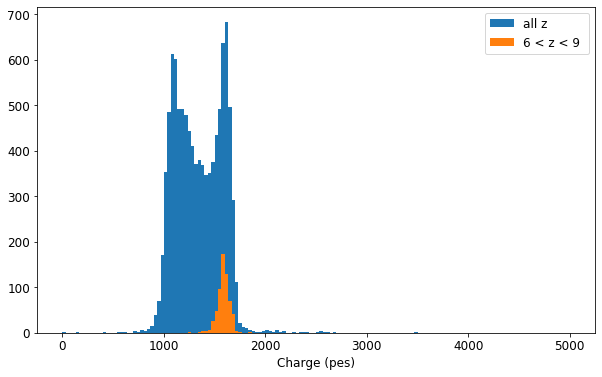

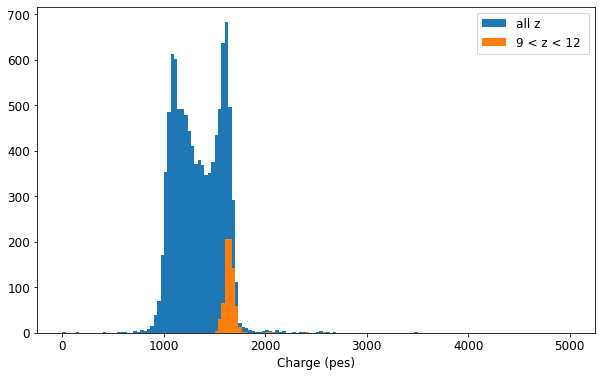

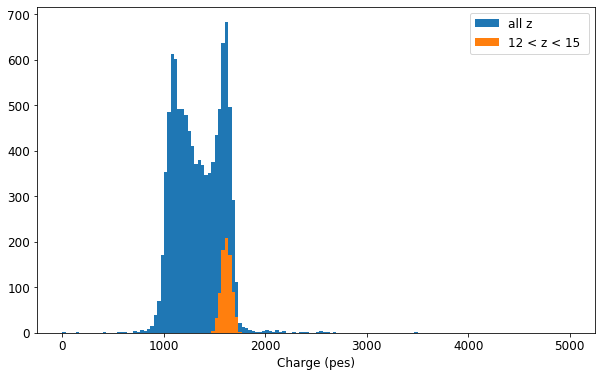

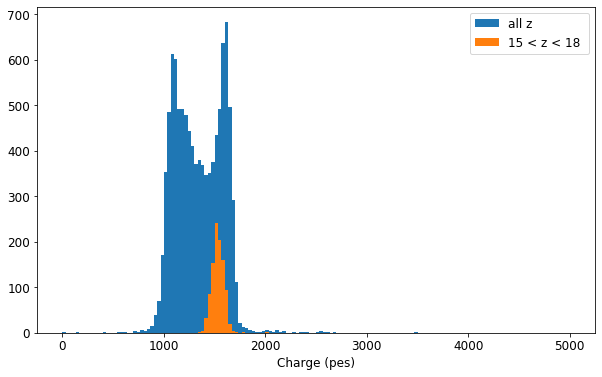

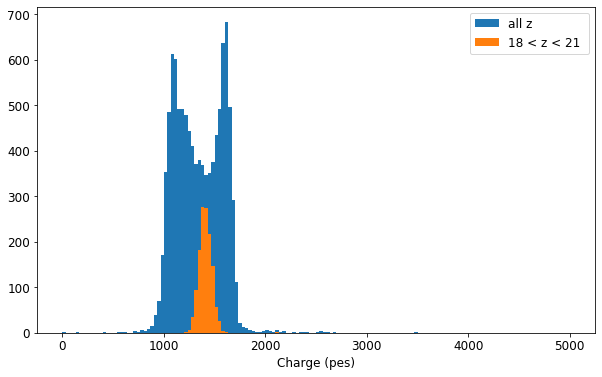

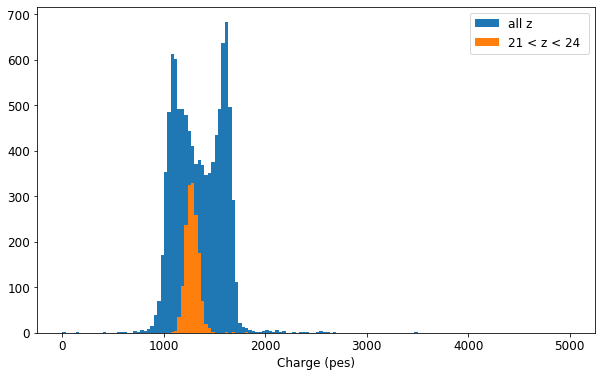

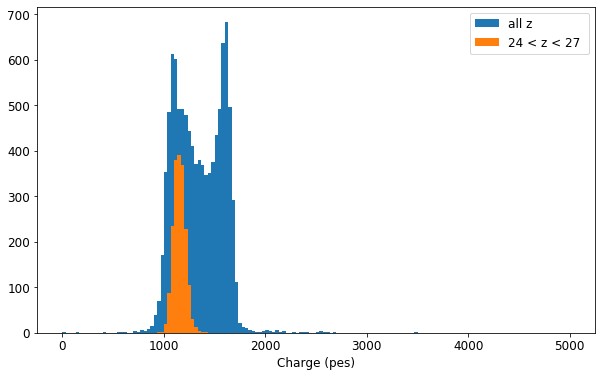

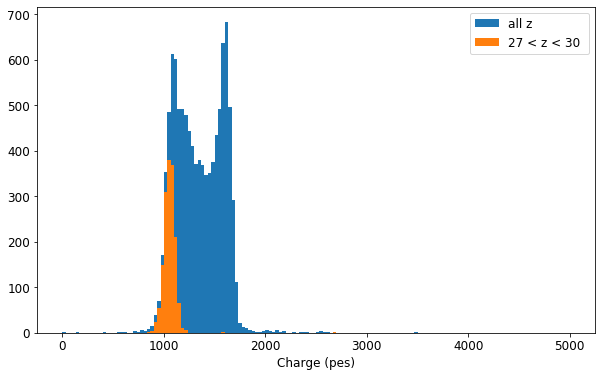

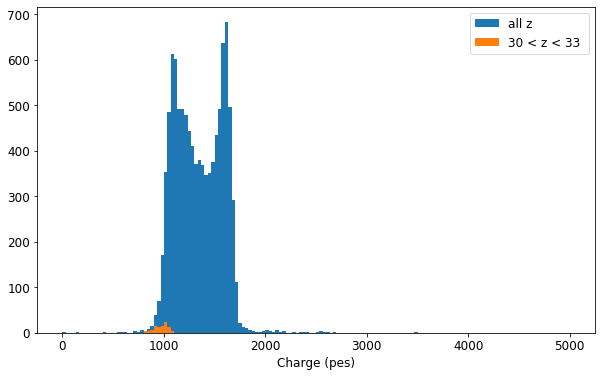

In [7]:
ch_range = (0,5000)
sel1 = (dist_true_sens_module > 0 ) & (dist_true_sens_module < 3 )
bins = np.histogram(np.hstack((tot_charges, tot_charges[sel1])), bins=150, range=ch_range)[1] #bin edges

plt.rcParams["figure.figsize"] = 10, 6
plt.rcParams["font.size"]      = 12

for i in range(0, 33, 3):
    sel = (dist_true_sens_module > i) & (dist_true_sens_module <i+3)
    plt.hist(tot_charges     , bins, ch_range, label=f'all z')
    plt.hist(tot_charges[sel], bins, ch_range, label=f'{i} < z < {i+3} ')
    plt.xlabel('Charge (pes)')
    plt.legend()
    plt.show()

### Mean of the R sensor position of the sensors weighted with their charge

In [9]:
tpos_xs = np.array(all_true_pos.T[0])
tpos_ys = np.array(all_true_pos.T[1])
tpos_zs = np.array(all_true_pos.T[2])

ranges_xy = (-21,21)
ranges_z  = (-54.2,-27)
bins    = 40

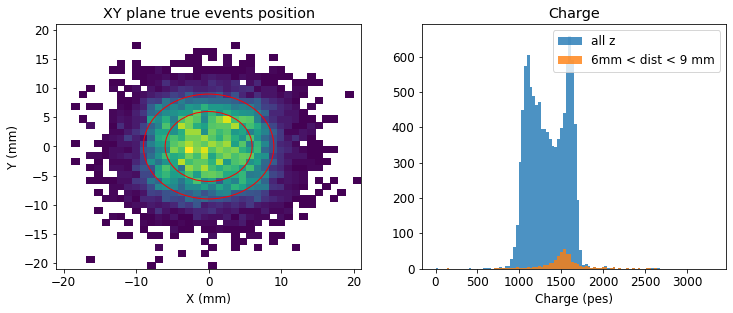

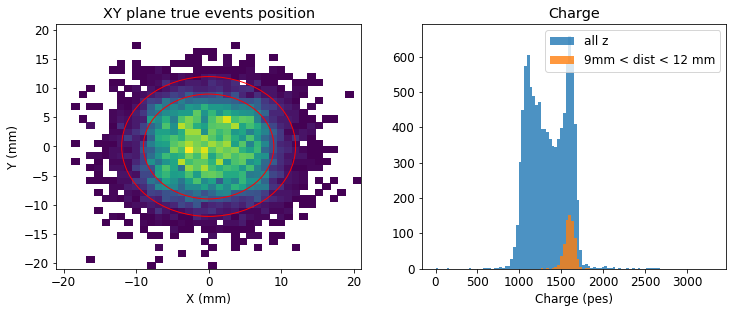

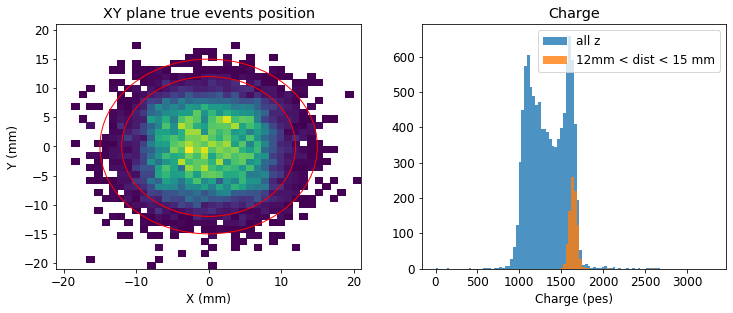

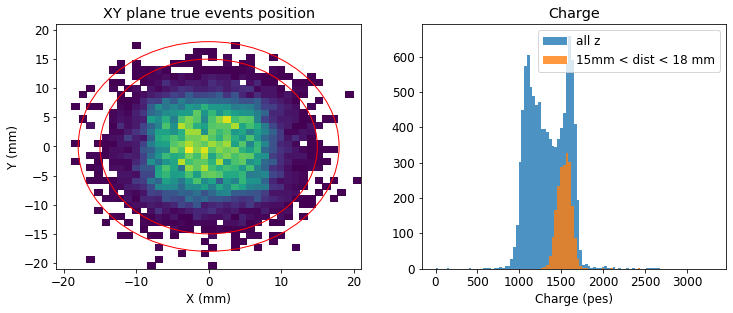

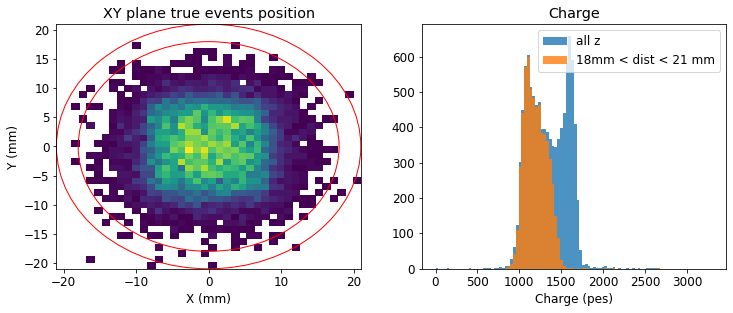

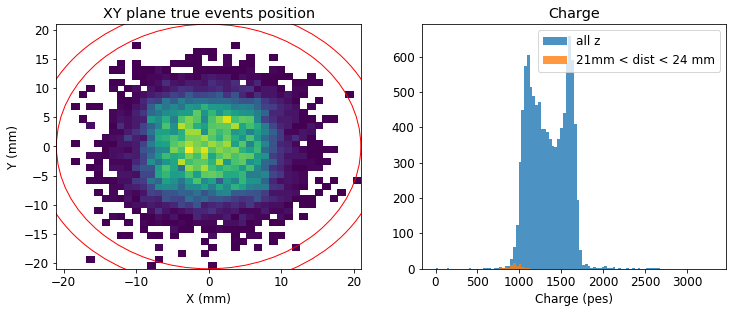

In [11]:
plt.rcParams["font.size"]      = 12
plt.rcParams["figure.figsize"] = 10, 6

ch_range = (0, 3300)
center_point = (0., 0.)

steps = 3
for lower_lim_r in range(6, 24, steps):
    upper_lim_r = lower_lim_r + steps
    sel  = (all_mean_rs > lower_lim_r) & (all_mean_rs < upper_lim_r)
    bins = np.histogram(np.hstack((tot_charges, tot_charges[sel])), bins=100, range=ch_range)[1]
    
    fig, (ax0, ax1) = plt.subplots(1,2,figsize=(12,4.5))
    ax0.hist2d(tpos_xs, tpos_ys, bins=(40, 40), range=(ranges_xy, ranges_xy), cmin=1)
    ax0.set_title(f'XY plane true events position')
    ax0.set_xlabel('X (mm)')
    ax0.set_ylabel('Y (mm)')
    circ1 = plt.Circle(center_point, lower_lim_r, color='r', fill=False)
    circ2 = plt.Circle(center_point, upper_lim_r, color='r', fill=False)
    ax0.add_artist(circ1)
    ax0.add_artist(circ2)
    
    ax1.hist(tot_charges     , bins, ch_range, label=f'all z', alpha=0.8)
    ax1.hist(tot_charges[sel], bins, ch_range, label=f'{lower_lim_r}mm < dist < {upper_lim_r} mm', alpha=0.8)
    ax1.set_title(f'Charge')
    ax1.set_xlabel('Charge (pes)')
    ax1.legend(loc=1)
    
    plt.show()